In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import cluster as clu
from sklearn import preprocessing as pre
from sklearn import pipeline as pip
from sklearn import datasets as dat
from sklearn import decomposition as dec
from sklearn import manifold as man
from scipy.cluster import hierarchy
from sklearn import compose as com
import plotly.graph_objects as go
from sklearn import neighbors as nn
from sklearn import metrics as met

# **Q1**

In [ ]:
data = pd.read_csv('drinks.csv')

data.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [ ]:
X=data.drop(["country", "continent"], axis=1)

**I did drop continent and country**

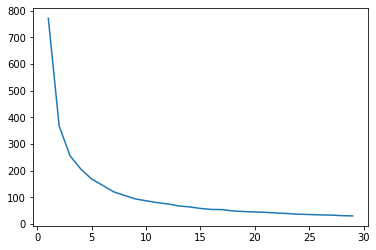

In [ ]:
x_values = []
y_values = []

for i in range(1, 30):
  pipe = pip.Pipeline([
          ("scaler", pre.StandardScaler()),
          ("kmeans", clu.KMeans(n_clusters=i, random_state=42))
  ])
  pipe.fit(X)
  x_values.append(i)
  y_values.append(pipe.named_steps["kmeans"].inertia_)

plt.plot(x_values, y_values)

plt.show()

***Zoomed Version***

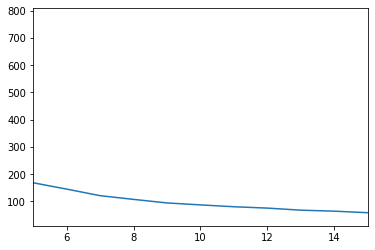

In [ ]:
x_values = []
y_values = []

for i in range(1, 20):
  pipe = pip.Pipeline([
          ("scaler", pre.StandardScaler()),
          ("kmeans", clu.KMeans(n_clusters=i, random_state=42))
  ])
  pipe.fit(X)
  x_values.append(i)
  y_values.append(pipe.named_steps["kmeans"].inertia_)

plt.plot(x_values, y_values)

plt.xlim([5, 15])
plt.show()

**I will use 7 as my cluster number as change become minimal after thatcan  curve  get flatter**

In [ ]:
country_names = data["country"]

In [ ]:
pipe = pip.Pipeline([
          ("scaler", pre.StandardScaler()),
          ("kmeans", clu.KMeans(n_clusters=7, random_state=42))])
pipe.fit(X)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=7, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=42,
                        tol=0.0001, verbose=0))],
         verbose=False)

In [ ]:
fig = go.Figure(data=go.Choropleth(
    locations = country_names,
    locationmode = "country names",
    z = pipe[1].labels_,
    text = country_names,
    colorscale = 'RdBu',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'ClusterNo:',
))

fig.update_layout(
    title_text='Clustering Results',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

fig.show()

# **Q2**

In [ ]:
data = pd.read_csv('housing.csv')

data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
import plotly.express as px
fig = px.scatter(data, x="longitude", y="latitude", color="median_house_value",color_continuous_scale='RdBu_r',
                 )

fig.show()

In [ ]:
X=data.drop(["median_house_value"], axis=1)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.4+ MB


In [ ]:
X.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [ ]:
from sklearn.impute import  SimpleImputer

In [ ]:
pipe_cat = pip.Pipeline([
            ("one_hot", pre.OneHotEncoder(handle_unknown="ignore", sparse=False))            
])

pipe_num = pip.Pipeline([("imputer",SimpleImputer( strategy='mean')),
            ("scaler", pre.StandardScaler())
])

ct = com.ColumnTransformer([
              ("num", pipe_num, X.select_dtypes(exclude="object").columns),
              ("cat", pipe_cat, ["ocean_proximity"]),
])

**I did create column transformer for imputing and scaling for numeric values and one hot encoding for categorical columns**

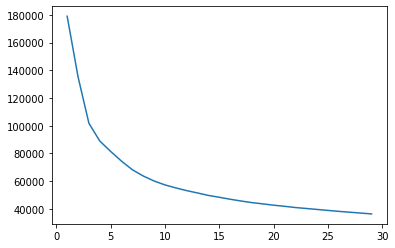

In [ ]:
x_values = []
y_values = []

for i in range(1, 30):
  pipe = pip.Pipeline([
              ("ct", ct),
              ("kmeans", clu.KMeans(n_clusters=i, random_state=42))
   ])

  pipe.fit(X);
  x_values.append(i)
  y_values.append(pipe.named_steps["kmeans"].inertia_)

plt.plot(x_values, y_values)
plt.show()

**Zoomed Version **

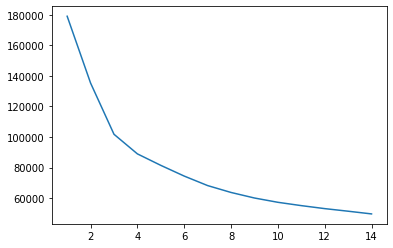

In [ ]:
x_values = []
y_values = []

for i in range(1, 15):
  pipe = pip.Pipeline([
              ("ct", ct),
              ("kmeans", clu.KMeans(n_clusters=i, random_state=42))
   ])

  pipe.fit(X);
  x_values.append(i)
  y_values.append(pipe.named_steps["kmeans"].inertia_)

plt.plot(x_values, y_values)
plt.show()

**I will use 9 as my cluster number as change become  minimal after this value curve gets flatter**

In [ ]:
 pipe = pip.Pipeline([
              ("ct", ct),
              ("kmeans", clu.KMeans(n_clusters=9, random_state=42))
   ])
pipe.fit(X)

Pipeline(memory=None,
         steps=[('ct',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='mean',
                                                                         

In [ ]:
import plotly.express as px
fig = px.scatter(X, x="longitude", y="latitude", color=pipe[1].labels_,color_continuous_scale='RdBu_r',
                )

fig.show()

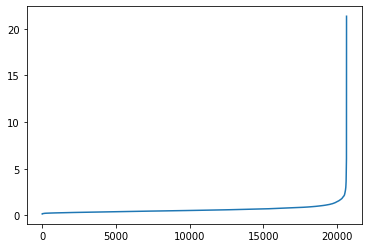

In [ ]:
pipe = pip.Pipeline([
              ("ct", ct),
               ("NN",nn.NearestNeighbors(n_neighbors=10, algorithm="kd_tree"))
   ])
pipe.fit(X)
distances, indices = pipe[1].kneighbors()
distanceDec = sorted(distances[:,9], reverse=False)
plt.plot(list(range(1,len(distances)+1)), distanceDec)

**As my min point is 10 so I will find 10 nearest neighbour and I draw plot to see distance values as we can see above after certain value(1 probably)  sharp change occurs in plot**

*Zoomed Version*

(0.0, 2.5)

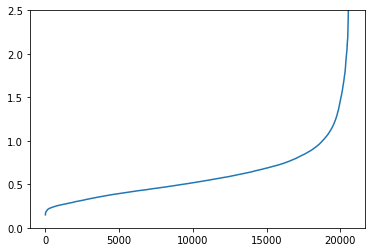

In [ ]:
pipe = pip.Pipeline([
              ("ct", ct),
               ("NN",nn.NearestNeighbors(n_neighbors=10, algorithm="kd_tree"))
   ])
pipe.fit(X)
distances, indices = pipe[1].kneighbors()
distanceDec = sorted(distances[:,9], reverse=False)
plt.plot(list(range(1,len(distances)+1)), distanceDec)
plt.ylim([0, 2.5])

**I will choose 1.**

In [ ]:
global_pipe = pip.Pipeline([
              ("ct", ct),
              ("dbscan", clu.DBSCAN(eps=1, min_samples=10))
])

global_pipe.fit(X)


Pipeline(memory=None,
         steps=[('ct',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='mean',
                                                                         

In [ ]:
import plotly.express as px
fig = px.scatter(X, x="longitude", y="latitude", color=global_pipe[1].labels_,color_continuous_scale='RdBu_r',
                )

fig.show()